downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_least_angle.py:753: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 9 iterations, alpha=1.031e-02, previous alpha=1.024e-02, with an active set of 10 regressors.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_least_angle.py:753: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 9 iterations, alpha=1.469e-02, previous alpha=1.440e-02, with an active set of 10 regressors.
  warnings.warn(


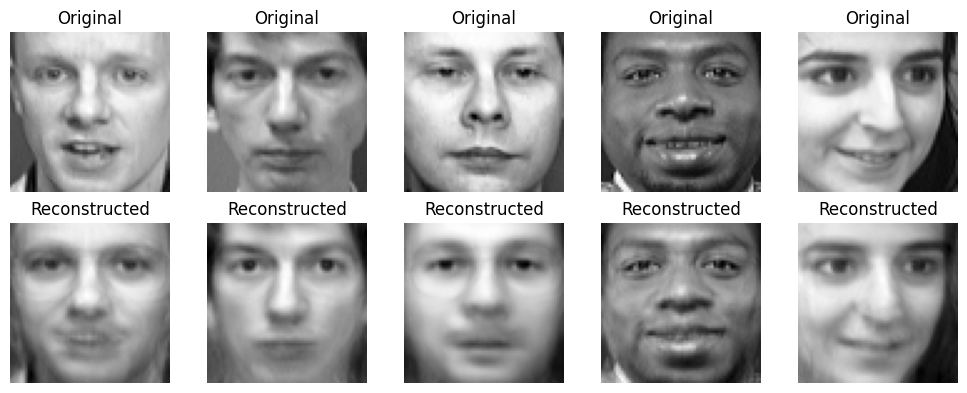

In [ ]:
#pip install scikit-learn matplotlib numpy opencv-python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA, DictionaryLearning
from sklearn.linear_model import OrthogonalMatchingPursuit

# Step 1: Load sample face images
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X = faces.data  # Each image is flattened to a 1D vector
image_shape = (64, 64)

# Step 2: Apply PCA for dimensionality reduction
n_components_pca = 100
pca = PCA(n_components=n_components_pca, whiten=True, random_state=42)
X_pca = pca.fit_transform(X)

# Step 3: Use Dictionary Learning for sparse coding
n_components_dict = 100
dict_learner = DictionaryLearning(n_components=n_components_dict, transform_algorithm='omp', transform_n_nonzero_coefs=10, random_state=42)
X_dict = dict_learner.fit_transform(X_pca)

# Step 4: Reconstruct the image using sparse representation
X_reconstructed = np.dot(X_dict, dict_learner.components_)
X_reconstructed = pca.inverse_transform(X_reconstructed)

# Helper function to plot original and reconstructed images
def plot_images(original, reconstructed, n=5):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        # Original
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(image_shape), cmap='gray')
        plt.title("Original")
        plt.axis('off')
        # Reconstructed
        plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(image_shape), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Step 5: Plot results
plot_images(X, X_reconstructed)
